In [1]:
import os

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
import numpy as np
import xarray as xr
import rioxarray as rxr
import earthpy as et
import earthpy.plot as ep

In [2]:
import seaborn as sns
sns.set(font_scale=1.5, style="whitegrid")

In [3]:
et.data.get_data("colorado-flood")
os.chdir(os.path.join(et.io.HOME, 'earth-analytics','data'))

In [4]:
dtm_path = os.path.join("colorado-flood",
                        "spatial",
                        "boulder-leehill-rd",
                        "pre-flood",
                        "lidar",
                        "pre_DTM.tif")

dsm_path = os.path.join("colorado-flood",
                        "spatial",
                        "boulder-leehill-rd",
                        "pre-flood",
                        "lidar",
                        "pre_DSM.tif")

pre_lidar_dtm = rxr.open_rasterio(dtm_path, masked=True).squeeze()

pre_lidar_dsm = rxr.open_rasterio(dsm_path, masked=True).squeeze()

pre_lidar_chm = pre_lidar_dsm - pre_lidar_dtm
pre_lidar_chm

<xarray.DataArray (y: 2000, x: 4000)> Size: 32MB
array([[       nan,        nan,        nan, ..., 0.        , 0.17004395,
        0.960083  ],
       [       nan,        nan,        nan, ..., 0.        , 0.09008789,
        1.6400146 ],
       [       nan,        nan,        nan, ..., 0.        , 0.        ,
        0.07995605],
       ...,
       [       nan,        nan,        nan, ..., 0.        , 0.        ,
        0.        ],
       [       nan,        nan,        nan, ..., 0.        , 0.        ,
        0.        ],
       [       nan,        nan,        nan, ..., 0.        , 0.        ,
        0.        ]], dtype=float32)
Coordinates:
    band         int64 8B 1
  * x            (x) float64 32kB 4.72e+05 4.72e+05 ... 4.76e+05 4.76e+05
  * y            (y) float64 16kB 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
    spatial_ref  int64 8B 0

In [5]:
print('CHM min value:', np.nanmin(pre_lidar_chm))

print('CHM max value:', np.nanmax(pre_lidar_chm))

CHM min value: 0.0
CHM max value: 26.930054


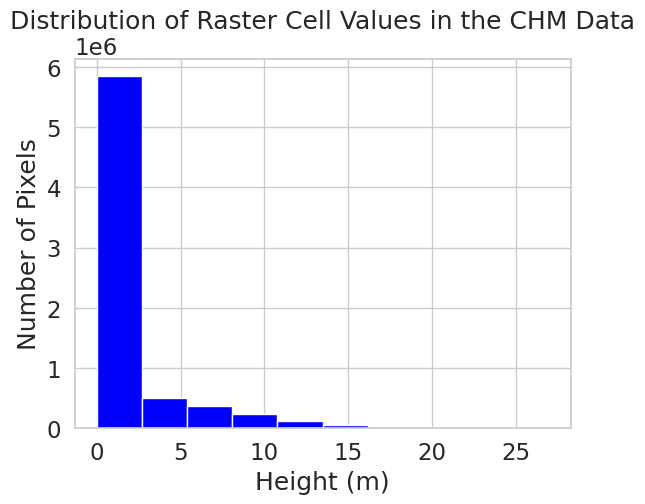

In [6]:
f, ax = plt.subplots()
pre_lidar_chm.plot.hist(color="blue")
ax.set(title="Distribution of Raster Cell Values in the CHM Data",
       xlabel="Height (m)",
       ylabel="Number of Pixels")
plt.show()

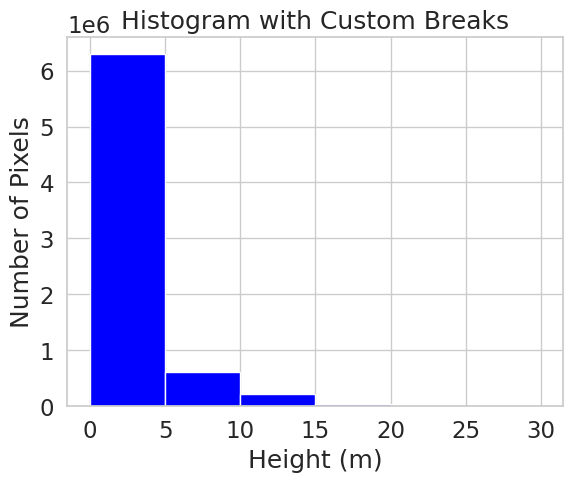

In [7]:
f, ax = plt.subplots()
pre_lidar_chm.plot.hist(color="blue",
                        bins=[0, 5, 10, 15, 20, 30])
ax.set(title="Histogram with Custom Breaks",
       xlabel="Height (m)",
       ylabel="Number of Pixels")

plt.show()

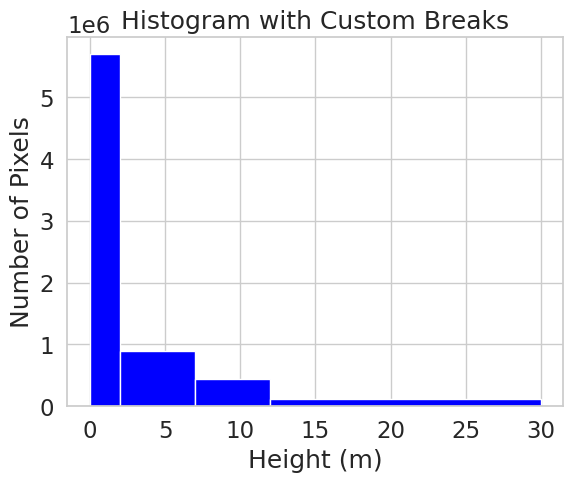

In [8]:
f, ax = plt.subplots()

pre_lidar_chm.plot.hist(
    color='blue',
    bins=[0, 2, 7, 12, 30])
ax.set(title="Histogram with Custom Breaks",
       xlabel="Height (m)",
       ylabel="Number of Pixels")

plt.show()

In [9]:
pre_lidar_chm.rio.nodata

In [10]:
data_min_value = np.nanmin(pre_lidar_chm)

data_max_value = np.nanmax(pre_lidar_chm)

print(data_min_value, data_max_value)

0.0 26.930054


In [11]:
class_bins = [-np.inf, 2, 7, 12, np.inf]

class_bins

[-inf, 2, 7, 12, inf]

In [12]:
pre_lidar_chm_class = xr.apply_ufunc(np.digitize,
                                     pre_lidar_chm,
                                     class_bins)

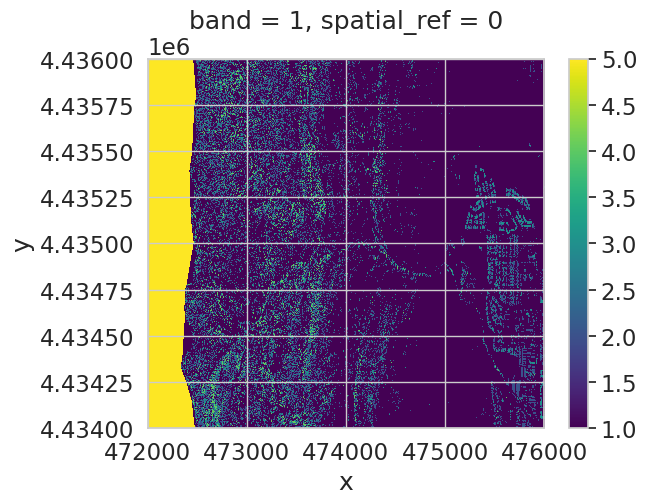

In [13]:
im = pre_lidar_chm_class.plot.imshow()

ax.set_axis_off()

In [14]:
pre_lidar_chm_class_ma = pre_lidar_chm_class.where(pre_lidar_chm_class != 5)

pre_lidar_chm_class_ma

<xarray.DataArray (y: 2000, x: 4000)> Size: 64MB
array([[nan, nan, nan, ...,  1.,  1.,  1.],
       [nan, nan, nan, ...,  1.,  1.,  1.],
       [nan, nan, nan, ...,  1.,  1.,  1.],
       ...,
       [nan, nan, nan, ...,  1.,  1.,  1.],
       [nan, nan, nan, ...,  1.,  1.,  1.],
       [nan, nan, nan, ...,  1.,  1.,  1.]])
Coordinates:
    band         int64 8B 1
  * x            (x) float64 32kB 4.72e+05 4.72e+05 ... 4.76e+05 4.76e+05
  * y            (y) float64 16kB 4.436e+06 4.436e+06 ... 4.434e+06 4.434e+06
    spatial_ref  int64 8B 0

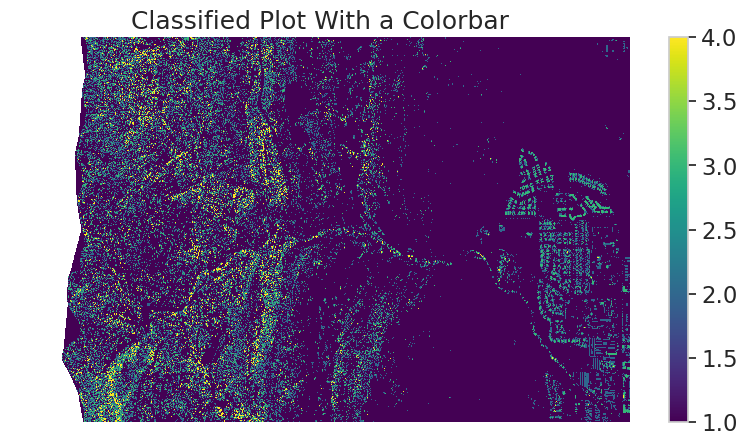

In [15]:
f, ax = plt.subplots(figsize=(10,5))
pre_lidar_chm_class_ma.plot.imshow()
ax.set(title="Classified Plot With a Colorbar")

ax.set_axis_off()
plt.show()

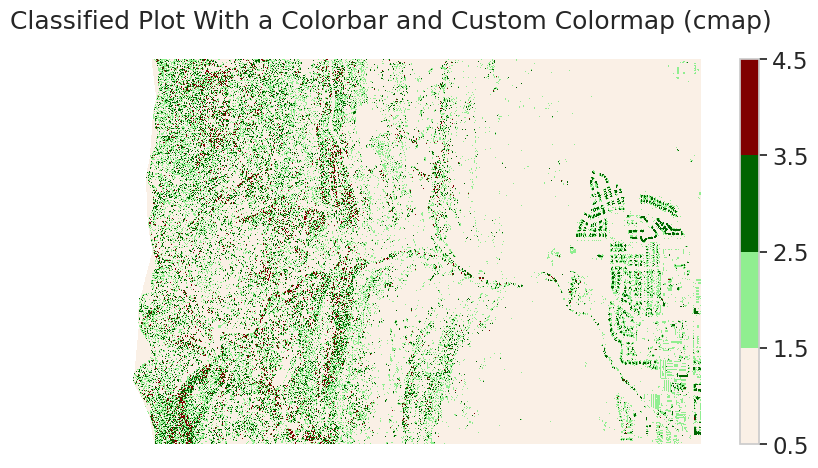

In [16]:
colors = ['linen', 'lightgreen', 'darkgreen', 'maroon']
class_bins = [.5, 1.5, 2.5, 3.5, 4.5]
cmap = ListedColormap(colors)
norm = BoundaryNorm(class_bins, 
                    len(colors))

f, ax = plt.subplots(figsize=(10, 5))
pre_lidar_chm_class_ma.plot.imshow(cmap=cmap,
                                   norm=norm)
ax.set(title="Classified Plot With a Colorbar and Custom Colormap (cmap)")
ax.set_axis_off()
plt.show()


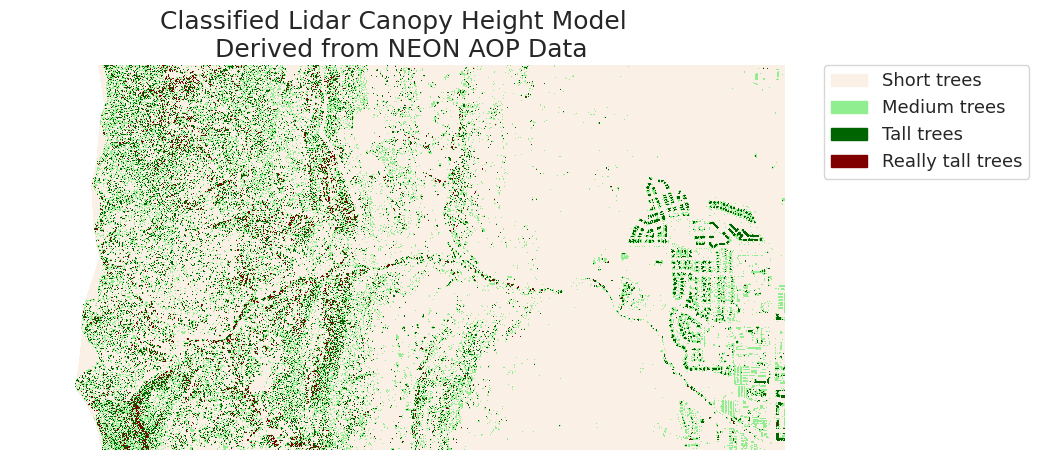

In [17]:
height_class_labels = ["Short trees",
                       "Medium trees",
                       "Tall trees",
                       "Really tall trees"]

colors = ['linen',
          'lightgreen',
          'darkgreen',
          'maroon']

cmap = ListedColormap(colors)

class_bins = [.5, 1.5, 2.5, 3.5, 4.5]
norm = BoundaryNorm(class_bins,
                    len(colors))

f, ax = plt.subplots(figsize=(10, 5))
im = pre_lidar_chm_class_ma.plot.imshow(cmap=cmap,
                                        norm=norm,
                                        add_colorbar=False)
ep.draw_legend(im,
               titles=height_class_labels)
ax.set(title="Classified Lidar Canopy Height Model \n Derived from NEON AOP Data")
ax.set_axis_off()
plt.show()